In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats, special, integrate
import statistics
import math
from statistics import multimode

# Teil I - Beschreibende Statistik

In [25]:
data = [25, 17, 25, 29, 20, 15, 11, 17, 16, 16]

## 01. Charakterisierung einer Stichprobe

### 01.1 Häufigkeitsverteilung einer Stichprobe

Länge 10
Verschiedene Werte [11 15 16 17 20 25 29]
Absolute Häufigkeiten [11 15 16 17 20 25 29] [1 1 2 2 1 2 1]
Relative Häufigkeiten [0.1 0.1 0.2 0.2 0.1 0.2 0.1]


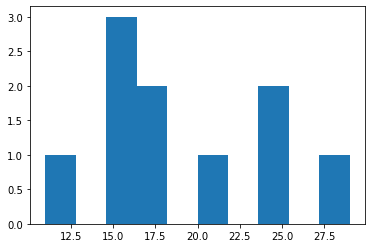

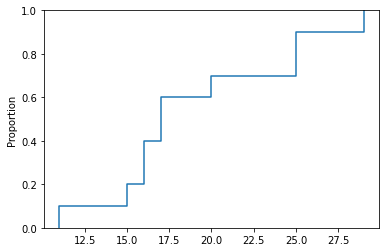

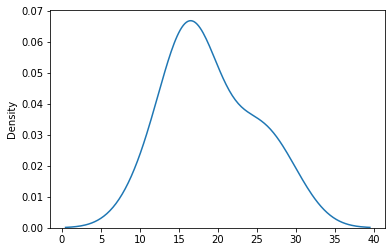

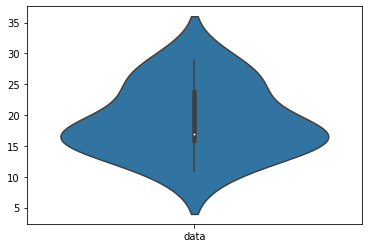

In [26]:
print('Länge', len(data))
print('Verschiedene Werte', np.unique(data))

# Häufigkeiten
data_unique, data_unique_counts = np.unique(data, return_counts=True)
print('Absolute Häufigkeiten', data_unique, data_unique_counts)
print('Relative Häufigkeiten', data_unique_counts / len(data))

# Histogramm
plt.hist(data)
plt.show()

# Verteilungsfunktion (CDF)
sns.ecdfplot(data)
plt.show()

# Kernel Density Estimation (KDE)
sns.kdeplot(data)
plt.show()

# Violinplot
df = pd.DataFrame({'data': pd.Series(data, dtype='int'), 'art': pd.Series(['a', 'b', 'a', 'c', 'd', 'a', 'd', 'c', 'c', 'a'], dtype='category')})
sns.violinplot(data=df)
plt.show()

### 01.2 Kennwerte einer Stichprobe

In [27]:
print('data', data)
print('Arithmetisches Mittel', np.mean(data))
print('Median', np.median(data))
print('Modalwert(e) =', multimode(data))
print('25% Quantil', np.quantile(data, q=0.25, method='midpoint'))
print('75% Quantil', np.quantile(data, q=0.75, method='midpoint'))
print('90% Quantil', np.quantile(data, q=0.9, method='midpoint'))
print('Empirische Varianz', np.var(data, ddof=1))
print('Empirische Standardabweichung', np.std(data, ddof=1))
print('Spannweite', max(data) - min(data))
print('Interquartilabstand', stats.iqr(data))
print('Empirische Schiefe', stats.skew(data))
print('Empirische Wölbung', stats.kurtosis(data))

data [25, 17, 25, 29, 20, 15, 11, 17, 16, 16]
Arithmetisches Mittel 19.1
Median 17.0
Modalwert(e) = [25, 17, 16]
25% Quantil 16.0
75% Quantil 22.5
90% Quantil 27.0
Empirische Varianz 30.988888888888894
Empirische Standardabweichung 5.566766466171264
Spannweite 18
Interquartilabstand 7.75
Empirische Schiefe 0.47750749866374975
Empirische Wölbung -0.834943558036291


## 02. Lineare Korrelation und Regression

In [28]:
data_b = [11, 11, 13, 9, 10, 7, 3, 8, 9, 4]
data_c = [0, 4, 0, 0, 0, 2, 2, 1, 3, 0]

### 02.1 Lineare Korrelation

Korrelationskoeffizient 
 [[1.        0.6778814]
 [0.6778814 1.       ]]
Kovarianz 
 [[30.98888889 11.83333333]
 [11.83333333  9.83333333]]


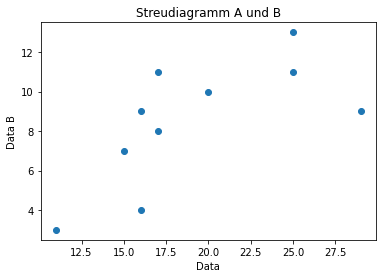

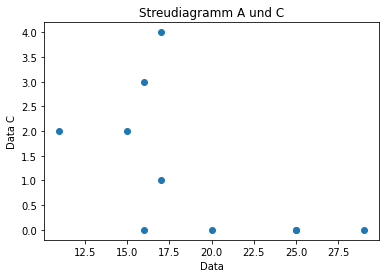

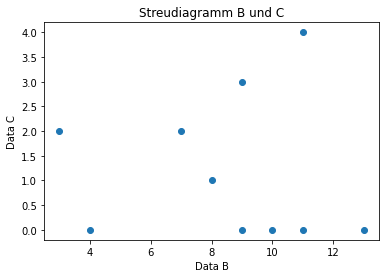

[Text(0.5, 1.0, 'Korrelationsmatrix')]

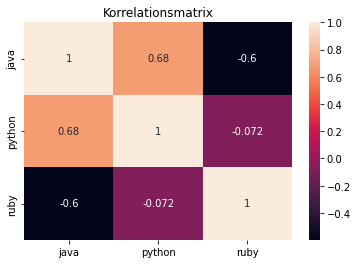

In [46]:
print('Korrelationskoeffizient \n', np.corrcoef(data, data_b))
print('Kovarianz \n', np.cov(data, data_b))

# Streudiagramm
fig, ax = plt.subplots() 
plt.plot(data, data_b, 'o') 
ax.set_title('Streudiagramm A und B')
ax.set_xlabel('Data') 
ax.set_ylabel('Data B') 
plt.show()
# Streudiagramm
fig, ax = plt.subplots() 
plt.plot(data, data_c, 'o') 
ax.set_title('Streudiagramm A und C')
ax.set_xlabel('Data') 
ax.set_ylabel('Data C') 
plt.show()
# Streudiagramm
fig, ax = plt.subplots() 
plt.plot(data_b, data_c, 'o') 
ax.set_title('Streudiagramm B und C')
ax.set_xlabel('Data B') 
ax.set_ylabel('Data C') 
plt.show()

# Korrelations Heatmap
df_corr = pd.DataFrame({'java': pd.Series(data), 'python': pd.Series(data_b), 'ruby': pd.Series(data_c)})
corr = df_corr.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True).set(title='Korrelationsmatrix')

### 02.2 Lineare Regression

Regressionsgerade 
 LinregressResult(slope=0.3818572965220509, intercept=1.206525636428827, rvalue=0.6778813962192024, pvalue=0.03122643424954198, stderr=0.1464168024130567, intercept_stderr=2.9014919416284664)


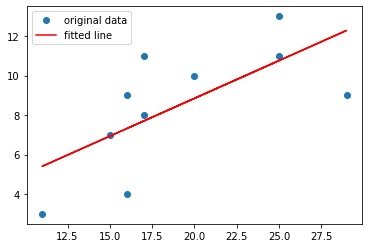

In [30]:
print('Regressionsgerade \n', stats.linregress(data, data_b))

# Regressionsgerade in Streudiagramm
reg = stats.linregress(data, data_b) 
plt.plot(data, data_b, 'o', label='original data') 
plt.plot(data, reg.intercept + reg.slope * np.asarray(data), 'r', label='fitted line') 
plt.legend() 
plt.show()

# Teil II - Diskrete Wahrscheinlichkeitstheorie

## 01. Wahrscheinlichkeitsrechnung

In [31]:
k = 2
n = 7

### 01.1 Kombinatorik

![](./assets/kombinatorik.png)

In [32]:
print('Permutation (ohne Wiederholung) =', special.factorial(n, exact=True))
print('Variation (ohne Wiederholung) =', special.perm(n, k, exact=True))
print('Variationen (mit Wiederholung) =', pow(n, k))
print('Kombination (ohne Wiederholung) =', special.comb(n, k, repetition=False, exact=True))
print('Kombination (mit Wiederholung) =', special.comb(n, k, repetition=True, exact=True))

Permutation (ohne Wiederholung) = 5040
Variation (ohne Wiederholung) = 42
Variationen (mit Wiederholung) = 49
Kombination (ohne Wiederholung) = 21
Kombination (mit Wiederholung) = 28


## 02. Zufallsvariablen

In [33]:
# Zur Demonstration wird ein Würfel mit acht Seiten 
# und folgender Verteilung der Zahlen verwendet:
X = [1,1,1,1,2,3,3,3]

Träger / Wertemenge [1. 2. 3.]
Relative Verteilung [0.5   0.125 0.375]
Absolute Verteilung [4. 1. 3.]


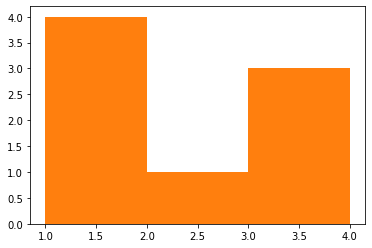

Verteilungsfunktion [0.5   0.625 1.   ]
Erwartungswert 1.875
Varianz 0.859375
Standardabweichung 0.9270248108869579


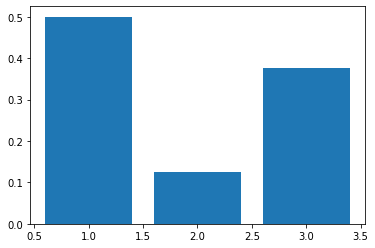

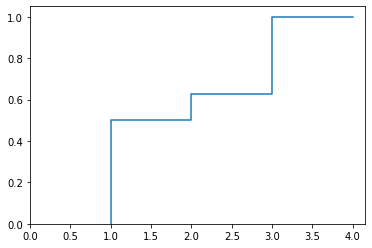

In [34]:
# Träger / Wertemenge
T = np.linspace(1, 3, 3)
print('Träger / Wertemenge', T)

# Verteilung
p, _, _ = plt.hist(X, np.linspace(1,4,4), density=True)
n, _, _ = plt.hist(X, np.linspace(1,4,4), density=False)
print('Relative Verteilung', p)
print('Absolute Verteilung', n)
plt.show()

print('Verteilungsfunktion', np.cumsum(p))
print('Erwartungswert', np.sum(T * p))
print('Varianz', np.var(X, ddof=0))
print('Standardabweichung', np.std(X, ddof=0))

# Verteilung zeichnen
plt.bar(T, p)
plt.show()

# Verteilungsfunktion zeichnen
y = np.concatenate((np.array([0]), np.cumsum(p)))
plt.step(np.linspace(1,4,4), y)
plt.xlim(0)
plt.ylim(0)
plt.show()


## 03. Wichtige diskrete Verteilungen

### 03.1 Bernoulli-Verteilung

#### Definition

![](./assets/bernoulli01.png)
![](./assets/bernoulli02.png)

#### Code

In [35]:
p = 0.7

print('Verteilung')
print('P(X = 0) =', stats.bernoulli(p).pmf(0))
print('P(X = 1) =', stats.bernoulli(p).pmf(1))

print('Verteilungsfunktion')
print('P(X <= -1) =', stats.bernoulli(p).cdf(-1))
print('P(X <= 0) =', stats.bernoulli(p).cdf(0))
print('P(X <= 1) =', stats.bernoulli(p).cdf(1))

print('Erwartungswert', stats.bernoulli(p).expect())
print('Varianz', stats.bernoulli(p).var())

Verteilung
P(X = 0) = 0.30000000000000004
P(X = 1) = 0.7
Verteilungsfunktion
P(X <= -1) = 0.0
P(X <= 0) = 0.30000000000000004
P(X <= 1) = 1.0
Erwartungswert 0.7
Varianz 0.21000000000000002


### 03.2 Geometrische Verteilung

#### Definition

![](./assets/geom01.png)
![](./assets/geom02.png)

#### Code

In [64]:
p = 0.55

print('Verteilung')
print('P(X = 0) =', stats.geom(p).pmf(0))
print('P(X = 1) =', stats.geom(p).pmf(1))
print('P(X = 2) =', stats.geom(p).pmf(2))

print('Verteilungsfunktion')
print('P(X <= 0) =', stats.geom(p).cdf(0))
print('P(X <= 1) =', stats.geom(p).cdf(1))
print('P(X <= 2) =', stats.geom(p).cdf(2))
print('P(X <= 3) =', stats.geom(p).cdf(3))

print('zu 90% min. 1 zahlender =', stats.geom(p).ppf(0.9))

print('Erwartungswert', stats.geom(p).expect())
print('Varianz', stats.geom(p).var())

Verteilung
P(X = 0) = 0.0
P(X = 1) = 0.55
P(X = 2) = 0.2475
Verteilungsfunktion
P(X <= 0) = 0.0
P(X <= 1) = 0.55
P(X <= 2) = 0.7975000000000001
P(X <= 3) = 0.908875
zu 90% min. 1 zahlender = 3.0
Erwartungswert 1.8181818181818181
Varianz 1.4876033057851235


### 03.3 Binomialverteilung

#### Definition

![](./assets/binom01.png)
![](./assets/binom02.png)

#### Code

In [61]:
n = 11
p = 0.65

print('Verteilung')
print('P(X = 3) =', stats.binom(n, p).pmf(3))

print('Verteilungsfunktion')
print('P(X <= 2) =', stats.binom(n, p).cdf(2))

print('Erwartungswert', stats.binom(n, p).expect())
print('Varianz', stats.binom(n, p).var())

Verteilung
P(X = 3) = 0.010203951105981436
Verteilungsfunktion
P(X <= 2) = 0.002038369455151366
Erwartungswert 7.149999999999999
Varianz 2.5025


In [62]:
n = 11
p = 0.55

print('Verteilung')
print('P(X = 3) =', stats.binom(n, p).pmf(3))

print('Verteilungsfunktion')
print('P(5 <= X <= 8) =', stats.binom(n, p).cdf(8) - stats.binom(n, p).cdf(4))

print('Erwartungswert', stats.binom(n, p).expect())
print('Varianz', stats.binom(n, p).var())

Verteilung
P(X = 3) = 0.046160672033276305
Verteilungsfunktion
P(5 <= X <= 8) = 0.7609760603470459
Erwartungswert 6.050000000000001
Varianz 2.7225


### 03.4 Hypergeometrische Verteilung

#### Definition

![](./assets/hypergeom01.png)
![](./assets/hypergeom02.png)

#### Code

In [38]:
n = 8
N = 50
M = 45

print('Verteilung')
print('P(X = 5) =', stats.hypergeom(N, M, n).pmf(5))

print('Verteilungsfunktion')
print('P(X <= 5) =', stats.hypergeom(N, M, n).cdf(5))

print('Erwartungswert', stats.hypergeom(N, M, n).expect())
print('Varianz', stats.hypergeom(N, M, n).var())

Verteilung
P(X = 5) = 0.022756706753006478
Verteilungsfunktion
P(X <= 5) = 0.024170741377031853
Erwartungswert 7.200000000000001
Varianz 0.6171428571428571


### 03.5 Poissonverteilung

#### Definition

![](./assets/poisson01.png)
![](./assets/poisson02.png)

#### Code

In [48]:
l = 7

print('Verteilung')
print('P(X = 5) =', stats.poisson(l).pmf(5))

print('Verteilungsfunktion')
print('P(X <= 5) =', stats.poisson(l).cdf(5))
print('P(6 <= A <= 8) =', stats.poisson(l).cdf(8) - stats.poisson(l).cdf(5))

print('Erwartungswert', stats.poisson(l).expect())
print('Varianz', stats.poisson(l).var())

Verteilung
P(X = 5) = 0.1277166682922895
Verteilungsfunktion
P(X <= 5) = 0.3007082761743609
P(6 <= A <= 8) = 0.4283829915637215
Erwartungswert 6.999999999999993
Varianz 7.0


# Teil III - Kontinuierliche Wahrscheinlichkeitstheorie

## 01. Erwartungswert und Varianz

#### Definition

![](./assets/stetige_e_var.png)

### Code

In [40]:
# Basic integration
left = 0
right = 2
def xF(x):
    return x * x ** 2
integrate.quad(xF, left, right)

(4.0, 4.440892098500626e-14)

In [41]:
# Erwartungswert und Varianz einer stetigen ZV

left = 0
right = 2

# Erwartungswert
# Integriere x * f(x) im Intervall
def xF(x):
    return x * (3/4*(x ** 2)*(2-x))
E, _ = integrate.quad(xF, left, right)
print('Erwartungswert', E)

# Varianz
# E(x^2) - E(x)^2
def x2F(x):
    return (x**2) * ((3/2)*(x**2)-(3/4)*(x**3))
# Integriere x^2 * f(x) im Intervall
V, _ = integrate.quad(x2F, left, right)
# Ziehe E^2 ab
V = V - E**2
print('Varianz', V)

# Standardabweichung ist die Quadratwurzel(Varianz)
print('Standardabweichung', math.sqrt(V))

Erwartungswert 1.2
Varianz 0.16000000000000014
Standardabweichung 0.4000000000000002


## 02. Wichtige stetige Verteilungen

### 02.1 Gleichverteilung

#### Definition

![](./assets/gleich01.png)
![](./assets/gleich02.png)

![](./assets/gleich01.png)
![](./assets/gleich02.png)

#### Code

In [42]:
a = 2
b = 10

print('Verteilungsdichte')
print('f(0) =', stats.uniform(a,b-a).pdf(0))
print('f(2) =', stats.uniform(a,b-a).pdf(2))
print('f(6) =', stats.uniform(a,b-a).pdf(6.3123))
print('f(10) =', stats.uniform(a,b-a).pdf(10))
print('f(12) =', stats.uniform(a,b-a).pdf(12))

print('Verteilungsfunktion')
print('P(X <= 0) =', stats.uniform(a,b-a).cdf(0))
print('P(X <= 2) =', stats.uniform(a,b-a).cdf(2))
print('P(X <= 5) =', stats.uniform(a,b-a).cdf(5))
print('P(X <= 7) =', stats.uniform(a,b-a).cdf(7))
print('P(X <= 10) =', stats.uniform(a,b-a).cdf(10))

print('p-Quantil')
print('10% Quantil', stats.uniform(a,b-a).ppf(0.1))
print('75% Quantil', stats.uniform(a,b-a).ppf(0.75))
print('100% Quantil', stats.uniform(a,b-a).ppf(1.0))

print('Erwartungswert', stats.uniform(a,b-a).expect())
print('Varianz', stats.uniform(a,b-a).var())

Verteilungsdichte
f(0) = 0.0
f(2) = 0.125
f(6) = 0.125
f(10) = 0.125
f(12) = 0.0
Verteilungsfunktion
P(X <= 0) = 0.0
P(X <= 2) = 0.0
P(X <= 5) = 0.375
P(X <= 7) = 0.625
P(X <= 10) = 1.0
p-Quantil
10% Quantil 2.8
75% Quantil 8.0
100% Quantil 10.0
Erwartungswert 6.0
Varianz 5.333333333333333


### 02.2 Exponentialverteilung

#### Definition

![](./assets/expon01.png)
![](./assets/expon02.png)

#### Code

In [53]:
l = 7

print('Verteilungsdichte')
print('f(0) =', stats.expon(scale=1/l).pdf(0))
print('f(0.5) =', stats.expon(scale=1/l).pdf(0.5))
print('f(1) =', stats.expon(scale=1/l).pdf(1))

print('Verteilungsfunktion')
print('P(X <= 1/7) =', stats.expon(scale=1/l).cdf(1/7))

print('p-Quantil')
print('10% Quantil', stats.expon(scale=1/l).ppf(0.1))
print('90% Quantil', stats.expon(scale=1/l).ppf(0.9))
print('100% Quantil', stats.expon(scale=1/l).ppf(1.0))

print('Erwartungswert', stats.expon(scale=1/l).expect())
print('Varianz', stats.expon(scale=1/l).var())

Verteilungsdichte
f(0) = 7.0
f(0.5) = 0.21138168395622953
f(1) = 0.0063831737588816145
Verteilungsfunktion
P(X <= 1/7) = 0.6321205588285577
p-Quantil
10% Quantil 0.01505150223683233
90% Quantil 0.32894072757057796
100% Quantil inf
Erwartungswert 0.14285714285714285
Varianz 0.02040816326530612


### 02.3 Normalverteilung

#### Definition

![](./assets/norm01.png)
![](./assets/norm02.png)
![](./assets/norm03.png)

#### Code

In [60]:
mu = 130
sigma = 15

print('Verteilungsdichte')
print('f(0) =', stats.norm(mu, sigma).pdf(0))
print('f(1) =', stats.norm(mu, sigma).pdf(1))
print('f(2) =', stats.norm(mu, sigma).pdf(2))

print('Verteilungsfunktion')
print('P(X <= 0) =', stats.norm(mu, sigma).cdf(0))
print('P(X <= 1) =', stats.norm(mu, sigma).cdf(1))
print('P(X <= 2) =', stats.norm(mu, sigma).cdf(2))
print('1 - P(X <= 120) =', 1-stats.norm(mu, sigma).cdf(120))

print('p-Quantil')
print('10% Quantil', stats.norm(mu, sigma).ppf(0.1))
print('25% Quantil', stats.norm(mu, sigma).ppf(0.25))
print('50% Quantil', stats.norm(mu, sigma).ppf(0.5))
print('75% Quantil', stats.norm(mu, sigma).ppf(0.75))
print('90% Quantil', stats.norm(mu, sigma).ppf(0.9))
print('95% Quantil', stats.norm(mu, sigma).ppf(0.95))
print('100% Quantil', stats.norm(mu, sigma).ppf(1.0))

print('Erwartungswert', stats.norm(mu, sigma).expect())
print('Varianz', stats.norm(mu, sigma).var())

Verteilungsdichte
f(0) = 1.3021117687947654e-18
f(1) = 2.3153084990441386e-18
f(2) = 4.098635242837972e-18
Verteilungsfunktion
P(X <= 0) = 2.224775978510436e-18
P(X <= 1) = 3.985804962848151e-18
P(X <= 2) = 7.109512037147456e-18
1 - P(X <= 120) = 0.7475074624530771
p-Quantil
10% Quantil 110.77672651683099
25% Quantil 119.88265374705878
50% Quantil 130.0
75% Quantil 140.11734625294122
90% Quantil 149.223273483169
95% - 5% Quantil 105.32719559572791
95% Quantil 154.67280440427209
100% Quantil inf
Erwartungswert 130.0
Varianz 225.0
